In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
df = pd.read_csv("C:/Users/ACER/Downloads/customer_data.csv")

In [17]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ACER\\results\\elbow_plot.png'

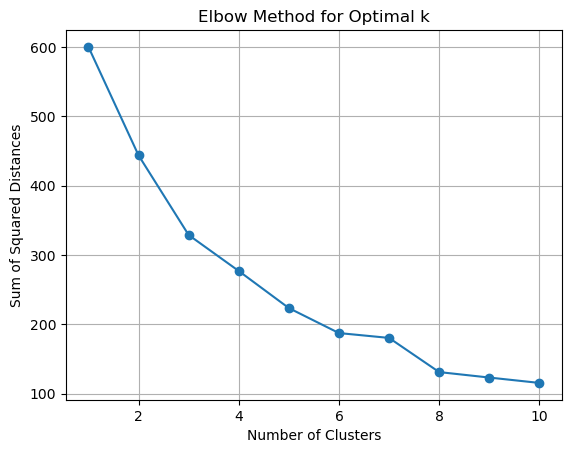

In [19]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.savefig('results/elbow_plot.png')

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ACER\\results\\customer_segments.png'

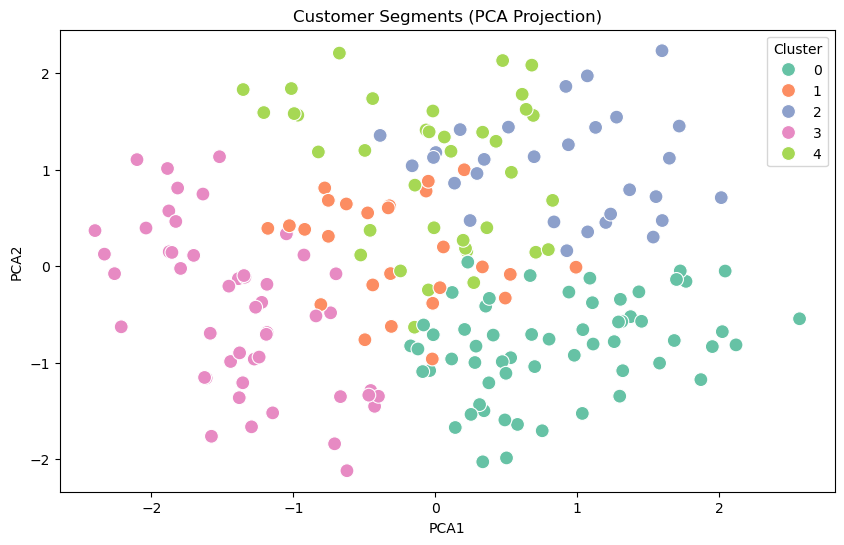

In [21]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# === Step 6: Visualize Clusters ===
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA Projection)')
plt.savefig('results/customer_segments.png')

In [27]:
import os

# Create 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Save the file
df.to_csv('results/segmented_customers.csv', index=False)


In [29]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Profile Summary:\n")
print(cluster_summary)


Cluster Profile Summary:

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        52.728814           81.237288               20.508475
1        55.038462          125.384615               74.884615
2        55.655172           54.275862               73.620690
3        27.489796          126.755102               49.755102
4        31.945946           44.918919               64.675676
